In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from scipy.stats import mode

### 1.Problem Statement

### 2.Data gathering

In [25]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\Data Science\Data Set\churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 3. EDA

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [27]:
# Number of rows:1000
# Number of columns:14
# Features having object datatype:3
# Features having int/float datatype:11

In [28]:
columns = df.columns
columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
df.shape

(10000, 14)

In [30]:
# 'RowNumber', 'CustomerId', 'Surname' does not contribute infomation  to target column.
df.drop(['RowNumber', 'CustomerId', 'Surname'],axis = 1,inplace = True)

In [31]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### Null values

In [32]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [33]:
# -no null/missing values
# -3 features has categorical values.So encoding needed.

In [34]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [35]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [36]:
not_exited = df['Exited'].value_counts()[0]
exited = df['Exited'].value_counts()[1]
exited_perc = (exited/len(df))*100
not_exited_perc = (not_exited/len(df))*100
print("Number of customers exited:",exited)
print("Number of customers not exited:",not_exited)
print("Precentage of customer exited:",exited_perc)
print("Precentage of customer not exited:",not_exited_perc)

Number of customers exited: 2037
Number of customers not exited: 7963
Precentage of customer exited: 20.369999999999997
Precentage of customer not exited: 79.63


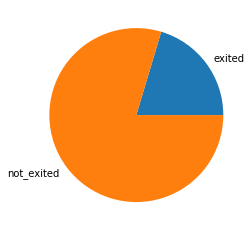

In [37]:
lst = [exited,not_exited]
plt.pie(lst,labels = ['exited','not_exited'])
plt.show()

### From given data, 20.36% of customer have exited and 79.63% have not exited 

<AxesSubplot:xlabel='Geography', ylabel='count'>

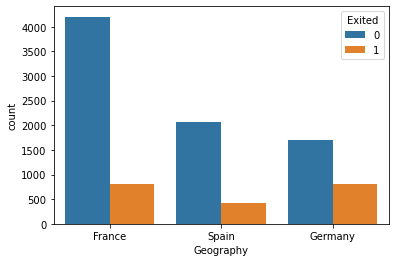

In [38]:
# Categorical features
sns.countplot(x = 'Geography',hue = 'Exited',data = df)

In [39]:
# Customers from Germany are more likely to churn as compared to France and Spain.

<AxesSubplot:xlabel='Gender', ylabel='count'>

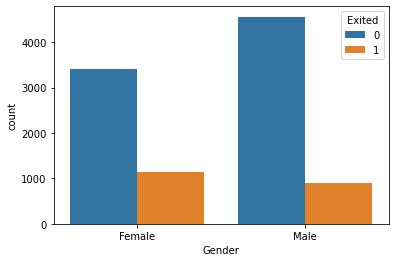

In [40]:
sns.countplot(x = 'Gender',hue = 'Exited',data = df)

In [41]:
# Female customers are more likely to churn.

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

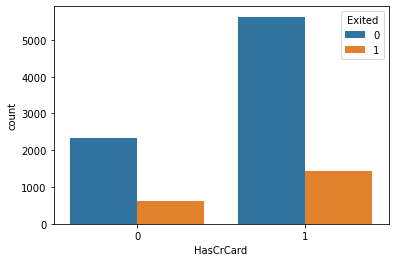

In [42]:
sns.countplot(x = 'HasCrCard',hue = 'Exited',data = df)

In [ ]:
# Customers who have credit card have more exits.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

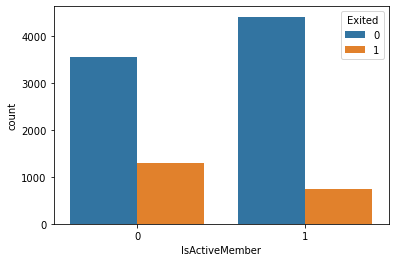

In [43]:
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df)

In [ ]:
# Active customers are less likely to churn

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

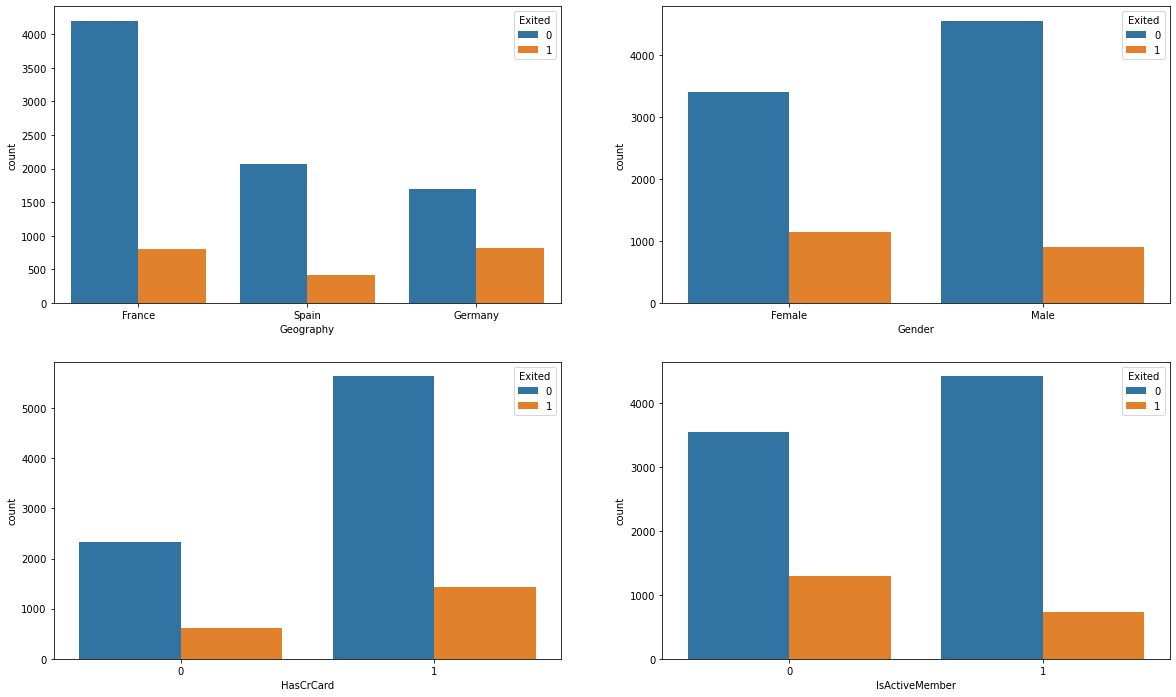

In [51]:

# fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
# sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
# sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
# sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
# sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])

In [45]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64

<AxesSubplot:xlabel='CreditScore', ylabel='Count'>

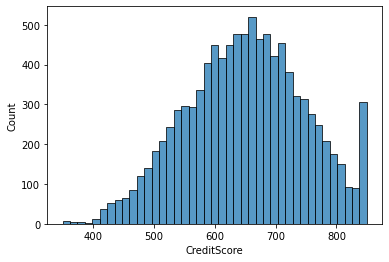

In [46]:
sns.histplot(df['CreditScore'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

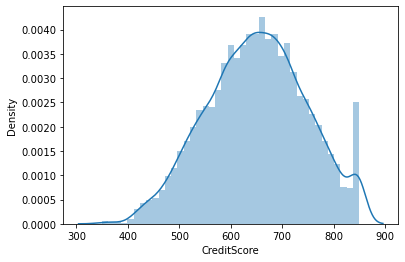

In [47]:
sns.distplot(df['CreditScore'])

In [48]:
# columns

In [49]:
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])

NameError: name 'dataset' is not defined